In [3]:
for i in tqdm(range(10000)):
    if i == 1000:
        print('1000')

  0%|          | 0/10000 [00:00<?, ?it/s]

1000


In [2]:
from tqdm.notebook import tqdm



In [1]:
1

1

  0%|          | 0/324 [00:00<?, ?it/s]

KeyboardInterrupt: 

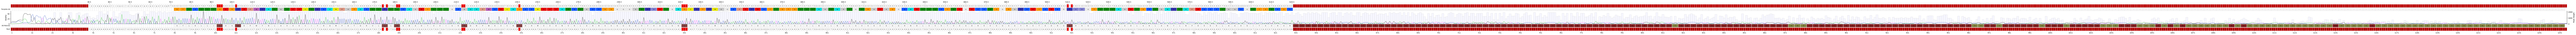

In [4]:
from pysanger import *
import matplotlib.pyplot as plt

import os
from Bio import SeqIO

from tqdm.notebook import tqdm

def tokenize_fp_make_id(inp):
    tokens = inp.replace('-', '_').split('_')
    user = tokens[0]
    construct = tokens[2]
    num = tokens[3]

    forward = 'Mcherry' in tokens
    reverse = 'WPRE' in tokens

    if not forward and not reverse:
        raise Exception('Neither forward nor reverse! Invalid filename.')
    else:
        if forward:
            primer = 'MCHERRY'
            direction = 'FORWARD'
            strand = 1
        else:
            primer = 'WPRE'
            direction = 'REVERSE'
            strand = -1

    id = f"{user}_{construct}_{num}_{primer}_{direction}"

    return id, strand

#read in template plasmid
with open("data/bfp-expression-control-mcherry-flag-hlpla-pcdna3-w37v.fasta") as file:
    for record in SeqIO.parse(file, "fasta"):
        template = record.seq

os.makedirs('output', exist_ok=True)
stat_list = []

for fp in tqdm(os.listdir('peter_data')):
    #abidata = abi_to_dict("data/PC_806488-574_2_PC-442--Mcherry-Seq-Forward_B10.ab1")
    id, strand = tokenize_fp_make_id(fp)
    abidata = abi_to_dict(f"peter_data/{fp}")

    if strand == 1:
        template_limits = (4660, 5250)
    else:
        template_limits = (5000, 5740)
    fig, stats = visualize(id, abidata, template=template, strand=strand, fig=None, region="read", translation_limits = (4702, None), template_limits = template_limits)
    
    fig.savefig(f'output/{id}.png', bbox_inches = "tight")
    plt.close()

    stat_list.append(stats)

stat_df = pd.concat(stat_list)
stat_df = stat_df.sort_values(by = 'id', ascending = True)
stat_df.to_csv('construct_info.csv', index = False)

In [5]:
1

1

In [6]:
1

1

In [7]:
1

1